<a href="https://colab.research.google.com/github/Viliuskerutis/AML/blob/main/AML_MP3_Kerutis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 3: Viral prediction

Date: 2020.12.~08~

Author: © 2020 ~[Your Name](our.contact.info)~  
Template author: © 2020 [Mantas Lukoševičius](https://mantas.info/)

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

You should only eddit this notebook where it is allowed, comment on all of your improvements in markdown cells and in your presentation.

Here we analyze open COVID-19 data from https://ourworldindata.org/coronavirus.

## Load the data

In [ ]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Download the data to cache locally. Do this once (a day), and comment out again, not to DoS the server. (adopted from https://stackoverflow.com/a/35997720).

In [ ]:
#'''
import requests
fname = 'owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/' + fname
r = requests.get(url)
open(fname, 'wb').write(r.content)
#''';

14455192

Load the file to Pandas.

In [ ]:
#url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
url = "owid-covid-data.csv" 
df = pd.read_csv(url, parse_dates=[3])

The time series to predict.

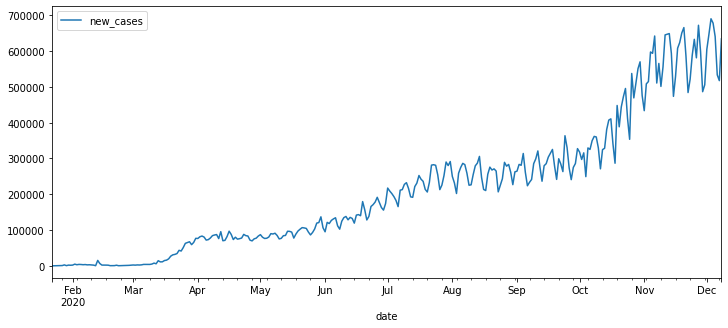

In [ ]:
column = 'new_cases'
time_series = df[df.iso_code=='OWID_WRL'][['date',column]].set_index('date')
time_series.plot(figsize=(12,5),logy=False)

Error measure used to evaluate your solution is Root Mean Square Log Error (RMSLE), square-root of 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error.

In [ ]:
from sklearn.metrics import mean_squared_log_error
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

Split the data into training and testing. You can temporality fix the dates in your experiments.

In [ ]:
from datetime import timedelta
# last_date will be 2020-12-23 in final testing, and other dates set accordingly 
last_semester_date = pd.Timestamp('2020-12-23')
last_date = time_series.index[-1]
if last_date >= last_semester_date:
    last_date = last_semester_date #  # 
    print("We can test now!")
# will be 2020-12-16 - the last date available before your dedline: end of 2020-12-17
last_training_date = last_date - timedelta(days=7) 
first_prediction_date = last_date - timedelta(days=6)
last_prediction_date = last_date
(last_training_date, first_prediction_date, last_prediction_date)

(Timestamp('2020-12-01 00:00:00'),
 Timestamp('2020-12-02 00:00:00'),
 Timestamp('2020-12-08 00:00:00'))

In [ ]:
training_time_series = time_series[:last_training_date]
testing_time_series = time_series[first_prediction_date:last_prediction_date]

# My models

**This is the only section which you should rewrite and expand significanlty providing/documenting your models tried and results with them. **

Give links to the sources of the models and the ideas!

Execution of this section should not take long (no training here ;).

## A simple persistency model 

Returns the last week as the prediction for the next one. 

Validation MRSLE with last_date=2020-12-07 is 0.07974867401899698. Training time: negligible. No hyper parameter optimization tried.

In [ ]:
def get_last_week(train_data):
    return train_data[-7:]

## Standard Facebook Prophet prediction library

Taken from https://facebook.github.io/prophet/.

Validation MRSLE with last_date=2020-12-07 is 0.11099341341289806. Training time: 1.55 ms on Colab . No hyper parameter optimization tried.

In [ ]:
# Install a pip package in the current Jupyter kernel if it's not present (takes some time). It is
# It is present in Colab.
# from https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
# import sys
# !{sys.executable} -m pip install pystan
# !{sys.executable} -m pip install fbprophet
from fbprophet import Prophet
def use_fb_prophet(train_data):
    m = Prophet()
    # the data must have the specific columns
    a = train_data.reset_index()
    b = a.rename(columns={'date': 'ds', 'new_cases': 'y'})

    m.fit(b)
    prediction_dates = m.make_future_dataframe(periods=7, include_history=False) 
    prediction = m.predict(prediction_dates)
    # and be formated back
    return prediction.set_index('ds')['yhat']

## Another model

Validation types, variations and hyper parameters tried (last_date=2020-12-07):

The results can be presented in Tables like this:

| Variation or hyper-parameter values | (Cross?-)Validation accuracy |
|-------|------------------------------|
| Variation 1 |    0.800000000000                 |

More on formatting markdown: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet


...

## My main best model

Was selected to be ...


In [ ]:
def my_best_method(train_data):
    return get_last_week(train_data)

# Testing / validation

Do not edit beyound this point!

Run the training and prediction with your best model:

In [ ]:
import time
start_time = time.time()

predicted_time_series = my_best_method(training_time_series)

end_time = time.time()
elapsed_time = end_time - start_time
max_training_time = 3*60*1000
print('Predicting time: %.2f ms (max %i ms.)' %(elapsed_time,max_training_time))  
assert elapsed_time <= max_training_time, 'Training is too long!'

Predicting time: 0.00 ms (max 180000 ms.)


In [ ]:
predicted_time_series

,new_cases
date,
2020-11-25,633045.0
2020-11-26,581314.0
2020-11-27,672318.0
2020-11-28,598701.0
2020-11-29,486678.0
2020-11-30,505910.0
2020-12-01,604959.0


Compute the error of your best model:

In [ ]:
RMSLE(testing_time_series, predicted_time_series)

0.08107388979182495

## Information on the obtained hardware

Only relavant if execution time is in question: then it is tested on Colab T100 node, just as in MP2.

In [ ]:
import os
osname = os.name
print(osname)
if osname == 'posix':
    f = os.popen('nvidia-smi')
    print(f.read())

    f = os.popen('lscpu')
    print(f.read())
elif osname == 'nt':
    # from https://winaero.com/get-cpu-information-via-command-prompt-in-windows-10/
    f = os.popen('wmic cpu get caption, deviceid, name, numberofcores, maxclockspeed, status')
    print(f.read())

posix
Wed Dec  9 10:15:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')